In [1]:
import iris

print(iris.__version__)

/opt/miniconda3/envs/iris_dev/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.8.2


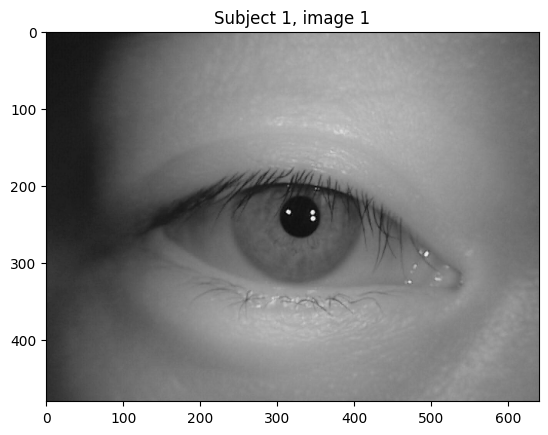

In [2]:
import cv2
import matplotlib.pyplot as plt
subject1_first_image = cv2.imread("/Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/device1/0000/0000_000.bmp", cv2.IMREAD_GRAYSCALE)


plt.imshow(subject1_first_image, cmap='gray')
plt.title('Subject 1, image 1')
plt.show()

In [16]:
import iris

iris_pipeline = iris.IRISPipeline()

output_1 = iris_pipeline(subject1_first_image, eye_side="left")
subject1_first_code = output_1['iris_template']

In [18]:
print(subject1_first_code)

iris_codes=[array([[[ True, False],
        [ True, False],
        [ True, False],
        ...,
        [ True,  True],
        [ True, False],
        [ True, False]],

       [[ True,  True],
        [ True,  True],
        [ True,  True],
        ...,
        [ True,  True],
        [ True,  True],
        [ True,  True]],

       [[False,  True],
        [ True,  True],
        [ True,  True],
        ...,
        [False,  True],
        [False,  True],
        [False,  True]],

       ...,

       [[ True,  True],
        [ True,  True],
        [ True,  True],
        ...,
        [ True,  True],
        [ True,  True],
        [ True,  True]],

       [[ True,  True],
        [ True,  True],
        [ True,  True],
        ...,
        [ True,  True],
        [ True,  True],
        [ True,  True]],

       [[ True,  True],
        [ True,  True],
        [ True,  True],
        ...,
        [ True,  True],
        [ True,  True],
        [ True,  True]]]), array([[[False,  Tru

In [8]:
import os
import cv2
import iris
import json

# Initialize pipeline once
iris_pipeline = iris.IRISPipeline()

root_dir = "/Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/device1"

results = []

for folder_number in range(0, 60):
    folder_name = f"{folder_number:04d}"
    folder_path = os.path.join(root_dir, folder_name)
    if not os.path.isdir(folder_path):
        print(f"[Warning] Folder not found: {folder_path}")
        continue

    eye_side = "left" if folder_number % 2 == 0 else "right"

    # Images from 000 to 019 (20 images per folder)
    for img_index in range(20):
        img_name = f"{folder_name}_{img_index:03d}.bmp"
        img_path = os.path.join(folder_path, img_name)

        if not os.path.isfile(img_path):
            print(f"[Warning] Image not found: {img_path}")
            continue

        # Read image in grayscale
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"[Warning] Could not read image: {img_path}")
            continue

        try:
            output = iris_pipeline(image, eye_side=eye_side)
            iris_template = output.get('iris_template', None)
            iris_code_version = output.get('iris_code_version', 'unknown')

            if iris_template is None:
                print(f"[Warning] No iris_template for {img_path}")
                continue

            # Store result for this image
            results.append({
                "folder": folder_name,
                "filename": img_name,
                "eye_side": eye_side,
                "iris_template": iris_template,  # keep as is (usually a list of arrays)
                "iris_code_version": iris_code_version
            })

            print(f"[Info] Processed {img_path} successfully.")

        except Exception as e:
            print(f"[Error] Processing failed for {img_path}: {e}")

# Save all results to a JSON file
with open("iris_results.json", "w") as f:
    # Note: iris_template contains numpy arrays, not directly JSON serializable
    # We need to convert arrays inside iris_template to lists for JSON compatibility

    def serialize_output(obj):
        if isinstance(obj, list):
            return [serialize_output(o) for o in obj]
        elif hasattr(obj, "tolist"):
            return obj.tolist()
        else:
            return obj

    serializable_results = []
    for r in results:
        r_serialized = r.copy()
        r_serialized['iris_template'] = serialize_output(r_serialized['iris_template'])
        serializable_results.append(r_serialized)

    json.dump(serializable_results, f, indent=2)

print(f"✅ Done! Processed {len(results)} images. Output saved to iris_results.json")


[Info] Processed /Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/device1/0000/0000_000.bmp successfully.
[Info] Processed /Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/device1/0000/0000_001.bmp successfully.
[Info] Processed /Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/device1/0000/0000_002.bmp successfully.
[Info] Processed /Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/device1/0000/0000_003.bmp successfully.
[Info] Processed /Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/device1/0000/0000_004.bmp successfully.
[Info] Processed /Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/device1/0000/0000_005.bmp successfully.
[Info] Processed /Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/device1/0000/0000_006.bmp successfully.
[Info] Processed /Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/device1/0000/0000_007.bmp successfully.
[Info] Processed /Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/devic

TypeError: Object of type IrisTemplate is not JSON serializable

In [8]:
import iris
import cv2
import json
import numpy as np

# Load image
image_path = "/Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/device1/0000/0000_000.bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Initialize pipeline
iris_pipeline = iris.IRISPipeline()

# Determine eye side
folder_name = image_path.split("/")[-2]
eye_side = "left" if int(folder_name) % 2 == 0 else "right"

# Run the pipeline
output = iris_pipeline(image, eye_side=eye_side)
iris_template = output.get('iris_template', None)

# Convert to JSON-serializable dict
def convert_iris_template(template):
    if template is None:
        return None

    serialized = {}
    if hasattr(template, 'iris_codes'):
        serialized['iris_codes'] = [arr.tolist() for arr in template.iris_codes]
    if hasattr(template, 'mask_codes'):
        serialized['mask_codes'] = [arr.tolist() for arr in template.mask_codes]
    if hasattr(template, 'iris_code_version'):
        serialized['iris_code_version'] = template.iris_code_version
    return serialized

# Prepare final result
result = {
    "folder": folder_name,
    "filename": image_path.split("/")[-1],
    "eye_side": eye_side,
    "iris_template": convert_iris_template(iris_template)
}

# Save to JSON
with open("test_iris_output.json", "w") as f:
    json.dump(result, f, indent=2)

print("✅ Processed 1 image and saved output to test_iris_output.json")


✅ Processed 1 image and saved output to test_iris_output.json


In [3]:
import iris
import cv2
import json
import numpy as np

# Load image
image_path = "/Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/device1/0000/0000_000.bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Initialize pipeline
iris_pipeline = iris.IRISPipeline()

# Determine eye side
folder_name = image_path.split("/")[-2]
eye_side = "left" if int(folder_name) % 2 == 0 else "right"

# Run the pipeline
output = iris_pipeline(image, eye_side=eye_side)
iris_template = output.get('iris_template', None)

# Function to summarize arrays
def summarize_array(arr):
    return {
        "shape": arr.shape,
        "preview": arr[:2].tolist()  # Only first 2 rows
    }

# Convert to JSON-serializable dict (summary only)
def convert_iris_template_summary(template):
    if template is None:
        return None

    serialized = {}
    if hasattr(template, 'iris_codes'):
        serialized['iris_codes'] = [summarize_array(arr) for arr in template.iris_codes]
    if hasattr(template, 'mask_codes'):
        serialized['mask_codes'] = [summarize_array(arr) for arr in template.mask_codes]
    if hasattr(template, 'iris_code_version'):
        serialized['iris_code_version'] = template.iris_code_version
    return serialized

# Prepare final result
result = {
    "folder": folder_name,
    "filename": image_path.split("/")[-1],
    "eye_side": eye_side,
    "iris_template": convert_iris_template_summary(iris_template)
}

# Save to JSON
with open("test_iris_output_summary.json", "w") as f:
    json.dump(result, f, indent=2)

print("✅ Saved summarized iris_template to test_iris_output_summary.json")

✅ Saved summarized iris_template to test_iris_output_summary.json


In [4]:
import iris
import cv2
import json
import numpy as np
import base64

# Helper to convert numpy array to base64 string
def array_to_base64(arr):
    return base64.b64encode(arr.tobytes()).decode('utf-8')

# Helper to convert full iris_template to JSON-compatible base64
def convert_iris_template_base64(template):
    if template is None:
        return None

    serialized = {}
    if hasattr(template, 'iris_codes'):
        serialized['iris_codes'] = [{
            "shape": arr.shape,
            "dtype": str(arr.dtype),
            "data": array_to_base64(arr)
        } for arr in template.iris_codes]
    if hasattr(template, 'mask_codes'):
        serialized['mask_codes'] = [{
            "shape": arr.shape,
            "dtype": str(arr.dtype),
            "data": array_to_base64(arr)
        } for arr in template.mask_codes]
    if hasattr(template, 'iris_code_version'):
        serialized['iris_code_version'] = template.iris_code_version
    return serialized

# Prepare full pipeline
image_path = "/Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/device1/0000/0000_000.bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
folder_name = image_path.split("/")[-2]
eye_side = "left" if int(folder_name) % 2 == 0 else "right"
iris_pipeline = iris.IRISPipeline()
output = iris_pipeline(image, eye_side=eye_side)
iris_template = output.get('iris_template', None)

result = {
    "folder": folder_name,
    "filename": image_path.split("/")[-1],
    "eye_side": eye_side,
    "iris_template": convert_iris_template_base64(iris_template)
}

# Save to JSON
with open("test_iris_output_base64.json", "w") as f:
    json.dump(result, f, indent=2)

print("✅ Saved base64 iris_template to test_iris_output_base64.json")


✅ Saved base64 iris_template to test_iris_output_base64.json


In [9]:
import iris
import cv2
import json
import numpy as np

# Load image
image_path = "/Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/device1/0000/0000_000.bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Initialize pipeline
iris_pipeline = iris.IRISPipeline()

# Determine eye side
folder_name = image_path.split("/")[-2]
eye_side = "left" if int(folder_name) % 2 == 0 else "right"

# Run the pipeline
output = iris_pipeline(image, eye_side=eye_side)
iris_template = output.get('iris_template', None)

# Convert to JSON-serializable dict (flattened into single line)
def convert_iris_template(template):
    if template is None:
        return None

    def flatten_and_join(arrays):
        flattened = [arr.astype(int).flatten() for arr in arrays]  # Convert bool → int → flatten
        concat = np.concatenate(flattened)
        return ''.join(map(str, concat.tolist()))  # Single long string of 0s and 1s

    serialized = {}
    if hasattr(template, 'iris_codes'):
        serialized['iris_codes'] = flatten_and_join(template.iris_codes)
    if hasattr(template, 'mask_codes'):
        serialized['mask_codes'] = flatten_and_join(template.mask_codes)
    if hasattr(template, 'iris_code_version'):
        serialized['iris_code_version'] = template.iris_code_version
    return serialized

# Prepare final result
result = {
    "folder": folder_name,
    "filename": image_path.split("/")[-1],
    "eye_side": eye_side,
    "iris_template": convert_iris_template(iris_template)
}

# Save to JSON
with open("test_iris_output.json", "w") as f:
    json.dump(result, f, indent=2)

print("✅ Processed 1 image and saved compact iris_template to test_iris_output.json")


✅ Processed 1 image and saved compact iris_template to test_iris_output.json


In [ ]:
import iris
import cv2
import json
import numpy as np
import os

# Path to the base folder containing folders 0000 - 0059
base_path = "/Users/danuporn/Documents/GitHub/open-iris-pantarat/colab/device1"

# Convert template to JSON-serializable compact form
def convert_iris_template(template):
    if template is None:
        return None

    def flatten_and_join(arrays):
        flattened = [arr.astype(int).flatten() for arr in arrays]
        concat = np.concatenate(flattened)
        return ''.join(map(str, concat.tolist()))

    serialized = {}
    if hasattr(template, 'iris_codes'):
        serialized['iris_codes'] = flatten_and_join(template.iris_codes)
    if hasattr(template, 'mask_codes'):
        serialized['mask_codes'] = flatten_and_join(template.mask_codes)
    if hasattr(template, 'iris_code_version'):
        serialized['iris_code_version'] = template.iris_code_version
    return serialized

# Initialize pipeline
iris_pipeline = iris.IRISPipeline()

# Collect results
all_results = []

for i in range(60):  # From 0000 to 0059
    folder_name = f"{i:04d}"
    folder_path = os.path.join(base_path, folder_name)

    if not os.path.isdir(folder_path):
        print(f"❌ Skipping missing folder: {folder_name}")
        continue

    # Sort filenames
    for filename in sorted(os.listdir(folder_path)):
        if filename.lower().endswith(".bmp"):
            image_path = os.path.join(folder_path, filename)

            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"⚠️ Failed to read: {image_path}")
                continue

            eye_side = "left" if int(folder_name) % 2 == 0 else "right"

            try:
                output = iris_pipeline(image, eye_side=eye_side)
                iris_template = output.get('iris_template', None)

                result = {
                    "folder": folder_name,
                    "filename": filename,
                    "eye_side": eye_side,
                    "iris_template": convert_iris_template(iris_template)
                }
                all_results.append(result)

                print(f"✅ Processed {folder_name}/{filename}")

            except Exception as e:
                print(f"❌ Error processing {folder_name}/{filename}: {e}")


# Save all results to JSON
with open("all_iris_templates.json", "w") as f:
    json.dump(all_results, f, indent=2)

print("🎉 Done! Saved all outputs to all_iris_templates.json")

✅ Processed 0000/0000_001.bmp
✅ Processed 0000/0000_015.bmp
✅ Processed 0000/0000_014.bmp
✅ Processed 0000/0000_000.bmp
✅ Processed 0000/0000_016.bmp
✅ Processed 0000/0000_002.bmp
✅ Processed 0000/0000_003.bmp
✅ Processed 0000/0000_017.bmp
✅ Processed 0000/0000_013.bmp
✅ Processed 0000/0000_007.bmp
✅ Processed 0000/0000_006.bmp
✅ Processed 0000/0000_012.bmp
✅ Processed 0000/0000_004.bmp
✅ Processed 0000/0000_010.bmp
✅ Processed 0000/0000_011.bmp
✅ Processed 0000/0000_005.bmp
✅ Processed 0000/0000_008.bmp
✅ Processed 0000/0000_009.bmp
✅ Processed 0000/0000_019.bmp
✅ Processed 0000/0000_018.bmp
✅ Processed 0001/0001_010.bmp
✅ Processed 0001/0001_004.bmp
✅ Processed 0001/0001_005.bmp
✅ Processed 0001/0001_011.bmp
✅ Processed 0001/0001_007.bmp
✅ Processed 0001/0001_013.bmp
✅ Processed 0001/0001_012.bmp
✅ Processed 0001/0001_006.bmp
✅ Processed 0001/0001_002.bmp
✅ Processed 0001/0001_016.bmp
✅ Processed 0001/0001_017.bmp
✅ Processed 0001/0001_003.bmp
✅ Processed 0001/0001_015.bmp
✅ Processe

KeyboardInterrupt: 